# **Table of Contents**


### 1. Introduction to Algorithms
   - Introduction
   - Recap

### 2. Selection Sort
   - What you’ll learn about performance
   - Solving problems
   - Binary search
   - Big O notation
   - Memory, Arrays, and Linked Lists
   - Inserting and Deletions
   - Recap

### 3. Recursion
   - Base case and recursive case
   - The call stack
   - Recap

### 4. Quicksort
   - Divide & conquer
   - Big O notation revisited
   - Merge sort vs. quicksort
   - Average vs. worst case
   - Recap

### 5. Hash Tables
   - Hash functions & use cases
   - Collisions
   - Performance & Load factor
   - A good hash function
   - Recap

### 6. Breadth-First Search
   - Introduction to graphs
   - Finding the shortest path
   - Implementing BFS
   - Running time
   - Recap

### 7. Dijkstra’s Algorithm
   - Working with Dijkstra’s algorithm
   - Terminology
   - Negative-weight edges
   - Implementation
   - Recap

### 8. Greedy Algorithms
   - Classroom scheduling problem
   - Knapsack problem
   - Approximation algorithms
   - NP-complete problems
   - Recap

### 9. Dynamic Programming
   - Knapsack problem & FAQ
   - Longest common substring
   - Longest common subsequence
   - Recap

### 10. K-Nearest Neighbors
   - Classifying oranges vs. grapefruit
   - Recommendations system
   - Feature extraction
   - Introduction to machine learning
   - Recap

### 11. Where to Go Next
   - Trees
   - Fourier transform
   - Parallel algorithms
   - MapReduce
   - Bloom filters & HyperLogLog
   - Epilogue


# **1. Selection Sort**

## **1.1 Example**

**QUESTION 1:** 

Alice has some cards with numbers written on them. She arranges the cards in decreasing order, and lays them out face down in a sequence on a table. She challenges Bob to pick out the card containing a given number by turning over as few cards as possible. Write a function to help Bob locate the card.

[Explanation in depth](https://jovian.com/learn/data-structures-and-algorithms-in-python/lesson/lesson-1-binary-search-linked-lists-and-complexity)


### **Strategy for solving the problem**

Here's a systematic strategy we'll apply for solving problems:

    - State the problem clearly. Identify the input & output formats.
    - Come up with some example inputs & outputs. Try to cover all edge cases.
    - Come up with a correct solution for the problem. State it in plain English.
    - Implement the solution and test it using example inputs. Fix bugs, if any.
    - Analyze the algorithm's complexity and identify inefficiencies, if any.
    - Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.

#### **1. State the problem clearly. Identify the input & output formats.**

##### **1.1 Problem**

We need to write a program to find the position of a given number in a list of numbers arranged in decreasing order. We also need to minimize the number of times we access elements from the list.

##### **1.2 input**

**cards:** A list of numbers sorted in decreasing order. E.g. [13, 11, 10, 7, 4, 3, 1, 0]

**query:** A number, whose position in the array is to be determined. E.g. 7

##### **1.3 output**

**position:** The position of query in the list cards. E.g. 3 in the above case (counting from 0)

In [30]:
# Based on the above, we can now create the signature of our function:

def locate_card(cards, query):
    pass

#### **2. Come up with some example inputs & outputs. Try to cover all edge cases.**

**Tip:** 

Don't stress it if you can't come up with an exhaustive list of test cases though. You can come back to this section and add more test cases as you discover them. Coming up with good test cases is a skill that takes practice

In [31]:
test = {
    'input': { 
        'cards': [13, 11, 10, 7, 4, 3, 1, 0], 
        'query': 7
    },
    'output': 3
}

tests = []
# query occurs in the middle
tests.append(test)


tests.append({
    'input': {
        'cards': [13, 11, 10, 7, 4, 3, 1, 0],
        'query': 1
    },
    'output': 6
})
# query is the first element
tests.append({
    'input': {
        'cards': [4, 2, 1, -1],
        'query': 4
    },
    'output': 0
})
# query is the last element
tests.append({
    'input': {
        'cards': [3, -1, -9, -127],
        'query': -127
    },
    'output': 3
})
# cards contains just one element, query
tests.append({
    'input': {
        'cards': [6],
        'query': 6
    },
    'output': 0 
})
# cards does not contain query 
tests.append({
    'input': {
        'cards': [9, 7, 5, 2, -9],
        'query': 4
    },
    'output': -1
})
# cards is empty
tests.append({
    'input': {
        'cards': [],
        'query': 7
    },
    'output': -1
})
# numbers can repeat in cards
tests.append({
    'input': {
        'cards': [8, 8, 6, 6, 6, 6, 6, 3, 2, 2, 2, 0, 0, 0],
        'query': 3
    },
    'output': 7
})
# query occurs multiple times
tests.append({
    'input': {
        'cards': [8, 8, 6, 6, 6, 6, 6, 6, 3, 2, 2, 2, 0, 0, 0],
        'query': 6
    },
    'output': 2
})

print(tests)
# locate_card(**test['input']) == test['output']


[{'input': {'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}, 'output': 3}, {'input': {'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 1}, 'output': 6}, {'input': {'cards': [4, 2, 1, -1], 'query': 4}, 'output': 0}, {'input': {'cards': [3, -1, -9, -127], 'query': -127}, 'output': 3}, {'input': {'cards': [6], 'query': 6}, 'output': 0}, {'input': {'cards': [9, 7, 5, 2, -9], 'query': 4}, 'output': -1}, {'input': {'cards': [], 'query': 7}, 'output': -1}, {'input': {'cards': [8, 8, 6, 6, 6, 6, 6, 3, 2, 2, 2, 0, 0, 0], 'query': 3}, 'output': 7}, {'input': {'cards': [8, 8, 6, 6, 6, 6, 6, 6, 3, 2, 2, 2, 0, 0, 0], 'query': 6}, 'output': 2}]


#### **3. Come up with a correct solution for the problem. State it in plain English.**

In this problem, coming up with a correct solution is quite easy: Bob can simply turn over cards in order one by one, till he find a card with the given number on it. Here's how we might implement it:

  - Create a variable position with the value 0.
  - Check whether the number at index position in card equals query.
  - If it does, position is the answer and can be returned from the function
  - If not, increment the value of position by 1, and repeat steps 2 to 5 till we reach the last position.
  - If the number was not found, return -1.


    - **Linear Search Algorithm:** Congratulations, we've just written our first algorithm! 

#### **4. Implement the solution and test it using example inputs. Fix bugs, if any.**

We are finally ready to implement our solution. All the work we've done so far will definitely come in handy, as we now exactly what we want our function to do, and we have an easy way of testing it on a variety of inputs.

In [32]:
def locate_card(cards, query):
    position = 0
    while position < len(cards):
        if cards[position] == query:
            return position
        position+=1
        # if position == len(cards):
            # return -1
    return -1


In [33]:
from jovian.pythondsa import evaluate_test_case
from jovian.pythondsa import evaluate_test_cases

print('Single Case:')
print(evaluate_test_case(locate_card,test))
print('\n\n\nAll Cases:')
print(evaluate_test_cases(locate_card,tests))

Single Case:

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}

Expected Output:
3


Actual Output:
3

Execution Time:
0.003 ms

Test Result:
PASSED

(3, True, 0.003)



All Cases:

TEST CASE #0

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}

Expected Output:
3


Actual Output:
3

Execution Time:
0.002 ms

Test Result:
PASSED


TEST CASE #1

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 1}

Expected Output:
6


Actual Output:
6

Execution Time:
0.002 ms

Test Result:
PASSED


TEST CASE #2

Input:
{'cards': [4, 2, 1, -1], 'query': 4}

Expected Output:
0


Actual Output:
0

Execution Time:
0.001 ms

Test Result:
PASSED


TEST CASE #3

Input:
{'cards': [3, -1, -9, -127], 'query': -127}

Expected Output:
3


Actual Output:
3

Execution Time:
0.001 ms

Test Result:
PASSED


TEST CASE #4

Input:
{'cards': [6], 'query': 6}

Expected Output:
0


Actual Output:
0

Execution Time:
0.001 ms

Test Result:
PASSED


TEST CASE #5

Input:
{'cards': [9, 7, 5, 2, -9], 'quer

#### **5. Analyze the algorithm's complexity and identify inefficiencies, if any.**

 - We implemented the task but still existing other variable of the task where we had been asked to  Minimize the number of times we access elements from the list cards"

- Since we access a list element once in every iteration, for a list of size N we access the elements from the list up to N times. Thus, Bob may need to overturn up to N cards in the worst case, to find the required card.

- So, we must study two terms of data structure and algorithms : 
    - **The Time Complexity**
    - **The Space Complexity**


 - **In the case of linear search:**

    - **The time complexity** of the algorithm is cN for some fixed constant c that depends on the number of operations we perform in each iteration and the time taken to execute a statement. Time complexity is sometimes also called the running time of the algorithm.

    - **The space complexity** is some constant c' (independent of N), since we just need a single variable position to iterate through the array, and it occupies a constant space in the computer's memory (RAM).

- **Big(O) Notation** 
   
   - Worst-case complexity is often expressed using the Big O notation. In the Big O, we drop fixed constants and lower powers of variables to capture the trend of relationship between the size of the input and the complexity of the algorithm i.e. if the complexity of the algorithm is cN^3 + dN^2 + eN + f, in the Big O notation it is expressed as O(N^3) 


**Thus, the time complexity of linear search is O(N) and its space complexity is O(1).**

#### **6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.**

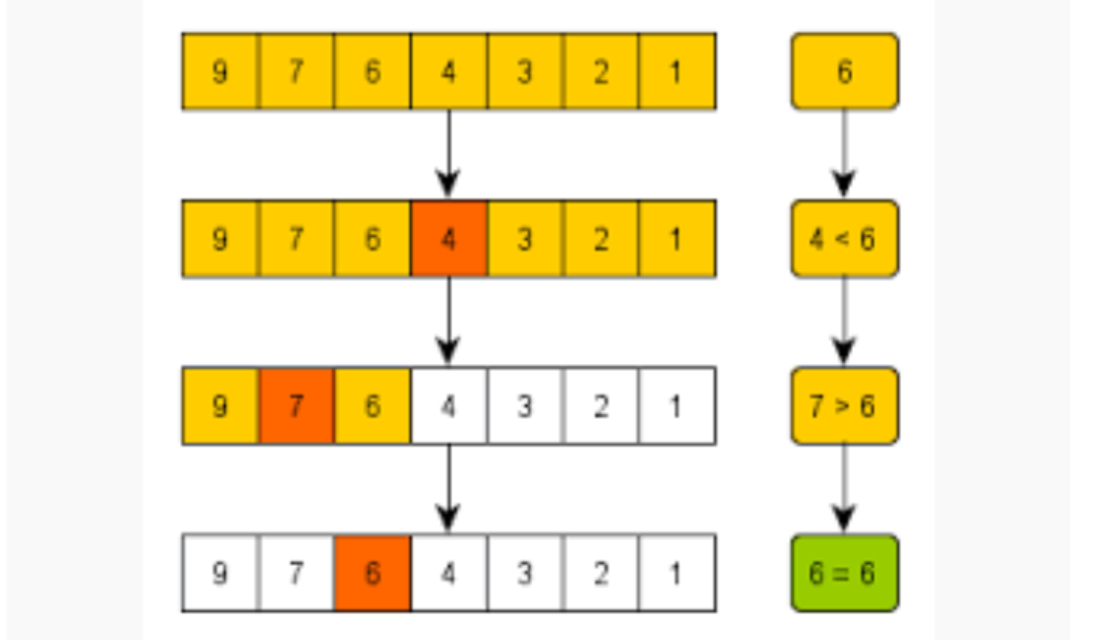






#### **7. Come up with a correct solution for the problem. State it in plain English.**

Here's how **binary search** can be applied to our problem:

 - Find the middle element of the list.
 - If it matches queried number, return the middle position as the answer.
 - If it is less than the queried number, then search the first half of the list
 - If it is greater than the queried number, then search the second half of the list
 - If no more elements remain, return -1.

#### **8. Implement the solution and test it using example inputs. Fix bugs, if any.**

In [34]:
def locate_card_Binary(cards, query):
    lo, hi = 0, len(cards)-1
    while (lo <= hi):
        mid = (lo + hi) // 2
        mid_number = cards[mid]
        print("lo:", lo, ", hi:", hi, ", mid:", mid, ", mid_number:", mid_number)
        if cards[mid] == query:
            return mid
        elif cards[mid] >= query: # right
            lo = mid +1
        else:                     # left
            hi = mid -1
    return -1

print('Single Case:')
print(evaluate_test_case(locate_card_Binary,test))
print('\n\n\nAll Cases:')
print(evaluate_test_cases(locate_card_Binary,tests))

Single Case:

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}

Expected Output:
3

lo: 0 , hi: 7 , mid: 3 , mid_number: 7

Actual Output:
3

Execution Time:
0.056 ms

Test Result:
PASSED

(3, True, 0.056)



All Cases:

TEST CASE #0
lo: 0 , hi: 7 , mid: 3 , mid_number: 7

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}

Expected Output:
3


Actual Output:
3

Execution Time:
0.033 ms

Test Result:
PASSED


TEST CASE #1
lo: 0 , hi: 7 , mid: 3 , mid_number: 7
lo: 4 , hi: 7 , mid: 5 , mid_number: 3
lo: 6 , hi: 7 , mid: 6 , mid_number: 1

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 1}

Expected Output:
6


Actual Output:
6

Execution Time:
0.094 ms

Test Result:
PASSED


TEST CASE #2
lo: 0 , hi: 3 , mid: 1 , mid_number: 2
lo: 0 , hi: 0 , mid: 0 , mid_number: 4

Input:
{'cards': [4, 2, 1, -1], 'query': 4}

Expected Output:
0


Actual Output:
0

Execution Time:
0.087 ms

Test Result:
PASSED


TEST CASE #3
lo: 0 , hi: 3 , mid: 1 , mid_number: -1
lo: 2 , hi: 3 , m

In [35]:
evaluate_test_case(locate_card_Binary, tests[8])



Input:
{'cards': [8, 8, 6, 6, 6, 6, 6, 6, 3, 2, 2, 2, 0, 0, 0], 'query': 6}

Expected Output:
2

lo: 0 , hi: 14 , mid: 7 , mid_number: 6

Actual Output:
7

Execution Time:
0.061 ms

Test Result:
FAILED



(7, False, 0.061)

In [36]:
"""  
When we find that cards[mid] is equal to query, 
we need to check whether it is the first occurrence 
of query in the list i.e the number that comes before it.
"""

def test_location(cards, query, mid):
    mid_number = cards[mid]
    if mid_number == query:
        if mid-1 >= 0 and cards[mid-1] == query:
            return 'left'
        else:
            return 'found'
    elif mid_number >= query: # right
        return 'right'
    else:                     # left
        return 'left'   

def locate_card_Binary(cards, query):
    lo, hi = 0, len(cards)-1
    while (lo <= hi):
        mid = (lo + hi) // 2
        result = test_location(cards, query, mid)
        if result == 'found':
            return mid
        elif result == 'right':
            lo = mid + 1        
        elif result == 'left':
            hi = mid - 1
    return -1


print('Single Case:')
print(evaluate_test_case(locate_card_Binary,test))
print('\n\n\nAll Cases:')
print(evaluate_test_cases(locate_card_Binary,tests))

Single Case:

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}

Expected Output:
3


Actual Output:
3

Execution Time:
0.004 ms

Test Result:
PASSED

(3, True, 0.004)



All Cases:

TEST CASE #0

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}

Expected Output:
3


Actual Output:
3

Execution Time:
0.003 ms

Test Result:
PASSED


TEST CASE #1

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 1}

Expected Output:
6


Actual Output:
6

Execution Time:
0.003 ms

Test Result:
PASSED


TEST CASE #2

Input:
{'cards': [4, 2, 1, -1], 'query': 4}

Expected Output:
0


Actual Output:
0

Execution Time:
0.002 ms

Test Result:
PASSED


TEST CASE #3

Input:
{'cards': [3, -1, -9, -127], 'query': -127}

Expected Output:
3


Actual Output:
3

Execution Time:
0.002 ms

Test Result:
PASSED


TEST CASE #4

Input:
{'cards': [6], 'query': 6}

Expected Output:
0


Actual Output:
0

Execution Time:
0.002 ms

Test Result:
PASSED


TEST CASE #5

Input:
{'cards': [9, 7, 5, 2, -9], 'quer

#### **9. Analyze the algorithm's complexity and identify inefficiencies, if any.**

 - Once again, let's try to count the number of iterations in the algorithm. If we start out with an array of N elements, then each time the size of the array reduces to half for the next iteration, until we are left with just 1 element.
 
**(Iteration k)** - **N/2^k**
Since the final length of the array is 1, we can find the: **N/2^k = 1**. Rearranging the terms, we get: **N = 2^k**. Taking the logarithm : **k = log N**

**Binary Search vs. Linear Search**


In [37]:
large_test = {
    'input': {
        'cards': list(range(10000000, 0, -1)),
        'query': 2
    },
    'output': 9999998
    
} 
result, passed, runtime = evaluate_test_case(locate_card, large_test, display=False)
print("Result: {}\nPassed: {}\nExecution Time: {} ms".format(result, passed, runtime))
result, passed, runtime = evaluate_test_case(locate_card_Binary, large_test, display=False)
print("Result: {}\nPassed: {}\nExecution Time: {} ms".format(result, passed, runtime))

Result: 9999998
Passed: True
Execution Time: 1221.74 ms
Result: 9999998
Passed: True
Execution Time: 0.013 ms


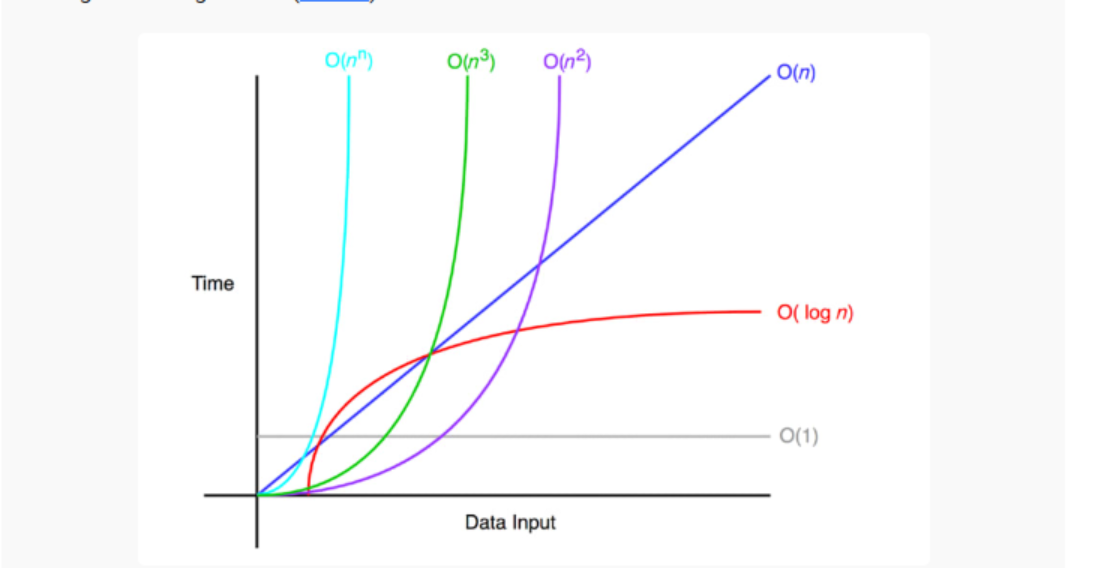

##  **1.2 Binary Tree** 

### **1.2.1 Example**

**QUESTION 1:** 

As a senior backend engineer at Jovian, you are tasked with developing a fast in-memory data structure to manage profile information (username, name and email) for 100 million users. It should allow the following operations to be performed efficiently:

 - Insert the profile information for a new user.
 - Find the profile information of a user, given their username
 - Update the profile information of a user, given their usrname
 - List all the users of the platform, sorted by username

You can assume that usernames are unique.

**The Method**

Here's a systematic strategy we'll apply for solving problems:

 - State the problem clearly. Identify the input & output formats.
 - Come up with some example inputs & outputs. Try to cover all edge cases.
 - Come up with a correct solution for the problem. State it in plain English.
 - Implement the solution and test it using example inputs. Fix bugs, if any.
 - Analyze the algorithm's complexity and identify inefficiencies, if any.
 - Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.

#### **1. State the problem clearly. Identify the input & output formats.**

**Problem:** 

 - We need to create a data structure which can store 100 million records and perform insertion, search, update and list operations efficiently.

**Input:** 

 - The key inputs to our data structure are user profiles, which contain the username, name and email of a user.

 - A Python class would be a great way to represent the information for a user. A class is a blueprint for creating objects.
 
**Output:** 

 - We can also express our desired data structure as a Python class UserDatabase with four methods: insert, find, update and list_all.



In [38]:
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
        print('user created successfully!')
    # def __repr__(self):
    #     return "User(username='{}', name='{}', email='{}')".format(self.username, self.name, self.email)  
    # def __str__(self):
    #     return self.__repr__()    
userone = User('jane', 'Jane Doe', 'jane@doe.com')
print(userone)    

user created successfully!


In [39]:
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email
        print(f'user {self.username} created successfully!')
    def __repr__(self):
        return "User(username='{}', name='{}', email='{}')".format(self.username, self.name, self.email)  
    def __str__(self):
        return self.__repr__()   
    def update_details(self, name=None, email=None):
        if name:
            self.name = name
        if email:
            self.email = email
        print(f'User {self.username} updated successfully!')

userone = User('jane', 'Jane Doe', 'jane@doe.com')
print(userone)    

user jane created successfully!
User(username='jane', name='Jane Doe', email='jane@doe.com')


In [40]:
class UserDatabase__:
    def insert(self, user):
        pass
    
    def find(self, username):
        pass
    
    def update(self, user):
        pass
        
    def list_all(self):
        pass

#### **2. Come up with some example inputs & outputs. Try to cover all edge cases.**

 - Let's create some sample user profiles that we can use to test our functions once we implement them.

**List some scenarios for testing the class methods insert, find, update and list_all.**


In [41]:
aakash = User('aakash', 'Aakash Rai', 'aakash@example.com')
biraj = User('biraj', 'Biraj Das', 'biraj@example.com')
hemanth = User('hemanth', 'Hemanth Jain', 'hemanth@example.com')
jadhesh = User('jadhesh', 'Jadhesh Verma', 'jadhesh@example.com')
siddhant = User('siddhant', 'Siddhant Sinha', 'siddhant@example.com')
sonaksh = User('sonaksh', 'Sonaksh Kumar', 'sonaksh@example.com')
vishal = User('vishal', 'Vishal Goel', 'vishal@example.com')
ahmed = User('ahmed', 'ahmed Goel', 'ahmed@example.com')
mariam = User('mariam', 'mariam Goel', 'mariam@example.com')

users = [aakash, biraj, hemanth, jadhesh, siddhant, sonaksh, vishal, ahmed, mariam]
users

user aakash created successfully!
user biraj created successfully!
user hemanth created successfully!
user jadhesh created successfully!
user siddhant created successfully!
user sonaksh created successfully!
user vishal created successfully!
user ahmed created successfully!
user mariam created successfully!


[User(username='aakash', name='Aakash Rai', email='aakash@example.com'),
 User(username='biraj', name='Biraj Das', email='biraj@example.com'),
 User(username='hemanth', name='Hemanth Jain', email='hemanth@example.com'),
 User(username='jadhesh', name='Jadhesh Verma', email='jadhesh@example.com'),
 User(username='siddhant', name='Siddhant Sinha', email='siddhant@example.com'),
 User(username='sonaksh', name='Sonaksh Kumar', email='sonaksh@example.com'),
 User(username='vishal', name='Vishal Goel', email='vishal@example.com'),
 User(username='ahmed', name='ahmed Goel', email='ahmed@example.com'),
 User(username='mariam', name='mariam Goel', email='mariam@example.com')]

#### **3. Come up with a correct solution. State it in plain English.**

 - Here's a simple and easy solution to the problem: we store the User objects in a **list sorted by usernames.**

 1. Insert: Loop through the list and add the new user at a position that keeps the list sorted.
 2. Find: Loop through the list and find the user object with the username matching the query.
 3. Update: Loop through the list, find the user object matching the query and update the details
 4. List: Return the list of user objects.



In [42]:
# We can use the fact usernames, which are are strings can be compared using the <, > and == operators in Python.

print('bfsdaj' < 'hemanth')
print('fwdraj' < 'yjemanth')
print('wqfweaj' < 'fsheweth')
print('ewqkiraj' < 'kuymanth')


True
True
False
True


#### **4. Implement the solution and test it using example inputs.**


In [43]:
class userdatabase:
    def __init__(self):
        self.users = []
    def insert(self, user):
        i = 0
        while i < len(self.users):
            if self.users[i].username > user.username:
                break
            i+=1
        self.users.insert(i, user)
        print(f'User {user.username} inserted successfully!')
    def find(self, username):
        for user in self.users:
            if user.username == username:
                return user
        print(f'User {username} not found!')
        return None            
    def update(self, username, name=None, email= None):
        user = self.find(username)
        if user:
            user.update_details(name, email)
        else:
            return (print(f'Cannot update: User {username} not found!'))
    def list_all(self):
        if not self.users:
            print('No users in the database!')
            return []
        for user in self.users:
            print(user)
        return self.users    # def __repr__(self):



In [44]:
# For explanation
# list_ex = [1,2,4,4,56,7]
# list_ex.append(4)
# list_ex 
# list_ex.insert(4,1)
# list_ex

database = userdatabase()
database.insert(ahmed)
database.insert(mariam)
database.find(ahmed)
database.find(mariam)
database.list_all()
database.update('ahmed', name='Ahmed Updated', email='Ahmed@email.com')
database.list_all()


User ahmed inserted successfully!
User mariam inserted successfully!
User User(username='ahmed', name='ahmed Goel', email='ahmed@example.com') not found!
User User(username='mariam', name='mariam Goel', email='mariam@example.com') not found!
User(username='ahmed', name='ahmed Goel', email='ahmed@example.com')
User(username='mariam', name='mariam Goel', email='mariam@example.com')
User ahmed updated successfully!
User(username='ahmed', name='Ahmed Updated', email='Ahmed@email.com')
User(username='mariam', name='mariam Goel', email='mariam@example.com')


[User(username='ahmed', name='Ahmed Updated', email='Ahmed@email.com'),
 User(username='mariam', name='mariam Goel', email='mariam@example.com')]

#### **5. Analyze the algorithm's complexity and identify inefficiencies**

The operations insert, find, update involves iterating over a list of users, in the worst case, they may take up to N iterations to return a result, where N is the total number of users. list_all however, simply returns the existing internal list of users.

Thus, the time complexities of the various operations are:

 - Insert : O(N)
 - Find   : O(N)
 - Update : O(N)
 - List   : O(1)

In [45]:
%%time
for i in range(100000000):
    j = i*i

CPU times: user 9.56 s, sys: 3.24 ms, total: 9.56 s
Wall time: 9.56 s


In [46]:
import math
import time

start_time = time.time()

for i in range(int(math.log(100000000))):
    j = i * i

end_time = time.time()

print(f"Execution time: {end_time - start_time} seconds")


Execution time: 6.198883056640625e-05 seconds


#### **6. Apply the right technique to overcome the inefficiency**

We can limit the number of iterations required for common operations like find, insert and update by organizing our data in the following structure, called a **Binary Tree**:

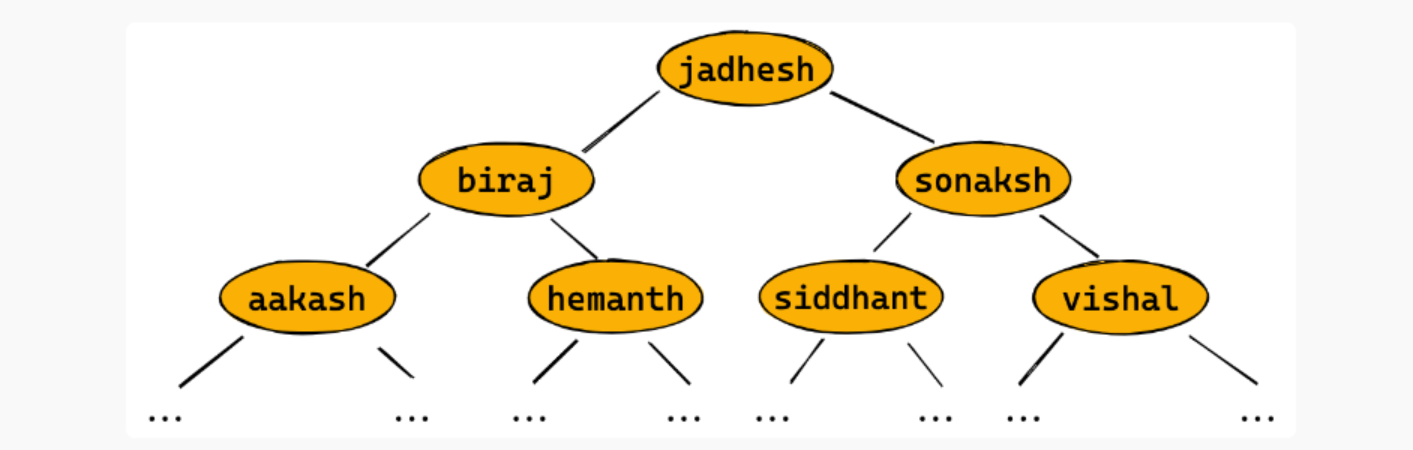

It's called a tree because it vaguely like an inverted tree trunk with branches.

 - The word "binary" indicates that each "node" in the tree can have at most 2 children (left or right).
 - Nodes can have 0, 1 or 2 children. Nodes that do not have any children are sometimes also called "leaves".
 - The single node at the top is called the "root" node, and it typically where operations like search, insertion etc. begin.

 ##### **Balanced Binary Search Trees**

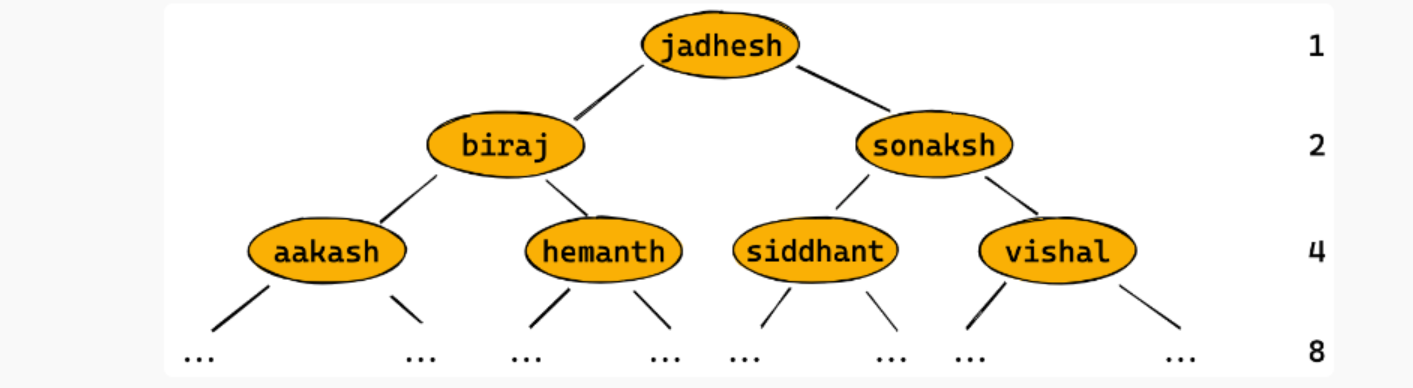

For our use case, we require the binary tree to have some additional properties:

 - **Keys and Values:** Each node of the tree stores a key (a username) and a value (a User object). Only keys are shown in the picture above for brevity. A binary tree where nodes have both a key and a value is often referred to as a **map** or **treemap** (because it maps keys to values).
 - **Binary Search Tree:** The left subtree of any node only contains nodes with keys that are lexicographically smaller than the node's key, and the right subtree of any node only contains nodes with keys that lexicographically larger than the node's key. A tree that satisfies this property is called a binary search trees, and it's easy to locate a specific key by traversing a single path down from the root note.
 - **Balanced Tree:** The tree is balanced i.e. it does not skew too heavily to one side or the other. The left and right subtrees of any node shouldn't differ in height/depth by more than 1 level.


##### **Comparison of Tree, Binary Tree, Binary Search Tree, and Balanced Binary Search Tree**

| **Aspect**                    | **Tree**                              | **Binary Tree (BT)**                       | **Binary Search Tree (BST)**                                   | **Balanced Binary Search Tree (BBST)**                        |
|-------------------------------|---------------------------------------|--------------------------------------------|---------------------------------------------------------------|--------------------------------------------------------------|
| **Definition**                 | A general data structure consisting of nodes connected by edges. | A tree in which each node has at most two children (left and right). | A binary tree where the left child is smaller, and the right child is larger than the parent. | A BST where the height difference between the subtrees of every node is bounded (typically by 1). |
| **Node Degree**                | Any number of child nodes.            | At most two children per node.             | At most two children per node.                                 | At most two children per node.                               |
| **Data Organization**          | Hierarchical                          | Hierarchical                               | Sorted in a way to allow binary search (left < parent < right) | Sorted as in BST but also balanced to ensure optimal height. |
| **Efficiency of Search**       | Varies                                | Varies, but O(n) in the worst case.        | O(log n) on average, but can degrade to O(n) in the worst case (unbalanced). | O(log n) for all cases, due to balancing.                    |
| **Insertion Complexity**       | Varies                                | O(n) in the worst case                     | O(log n) on average, but O(n) in the worst case (unbalanced).  | O(log n) due to rebalancing operations.                      |
| **Deletion Complexity**        | Varies                                | O(n) in the worst case                     | O(log n) on average, but O(n) in the worst case (unbalanced).  | O(log n) due to rebalancing operations.                      |
| **Balancing**                  | Not required                          | Not required                               | Not required                                                   | Required to maintain O(log n) operations.                    |
| **Examples**                   | File system hierarchy, organizational structure. | Complete binary tree, full binary tree.    | AVL tree, Red-Black tree, Splay tree.                          | AVL tree, Red-Black tree.                                    |
| **Use Cases**                  | General-purpose, flexible data structure. | Memory heaps, expression trees.            | Efficient searching, insertion, and deletion in dynamic sets.  | Same as BST but with guaranteed efficiency for all operations. |


 ##### **Height of a Binary Tree**

 The number of levels in a tree is called its height. As you can tell from the picture above, each level of a tree contains twice as many nodes as the previous level.

For a tree of height k, here's a list of the number of nodes at each level:

 - Level 0: 1
 - Level 1: 2
 - Level 2: 4 i.e. 2^2
 - Level k-1: 2^(k-1)

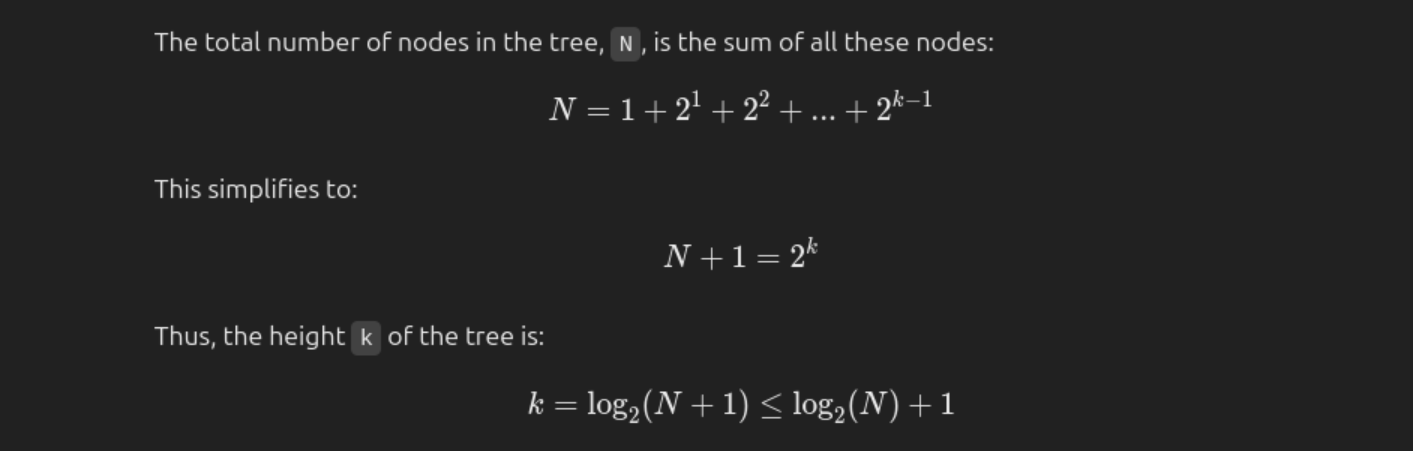

 - In a balanced binary search tree (BST), the height is no greater than log(N) + 1, which means operations like insert, find, and update take O(log N) time, since they only involve traversing from the root to a leaf node along one path.

 ##### **6.1  Binary Tree**

**QUESTION 2:** Implement a binary tree using Python, and show its usage with some examples.

**QUESTION 3:** Write a function to perform the inorder traversal of a binary tree.

**QUESTION 4:** Write a function to perform the preorder traversal of a binary tree.

**QUESTION 5:** Write a function to perform the postorder traversal of a binary tree.

**QUESTION 6:** Write a function to calculate the height/depth of a binary tree

**QUESTION 7:** Write a function to count the number of nodes in a binary tree


 ##### **6.2  Binary Search Tree and Balanced BST**

**QUESTION 8:** Write a function to check if a binary tree is a binary search tree (BST).

**QUESTION 9:** Write a function to find the maximum key in a binary tree.

**QUESTION 10:** Write a function to find the minimum key in a binary tree.

**QUESTION 11:** Write a function to insert a new node into a BST.

**QUESTION 12:** Find the value associated with a given key in a BST.

**QUESTION 13:** Write a function to update the value associated with a given key within a BST

**QUESTION 14:** Write a function to update the value associated with a given key within a BST

**QUESTION 15:** Write a function to determine if a binary tree is balanced.

**QUESTION 16:** Write a function to create a balanced BST from a sorted list/array of key-value pairs.

**QUESTION 17:** Write a function to balance an unbalanced binary search tree.

 ##### **6.3  A Python-Friendly Treemap**
We are now ready to return to our original problem statement.

**QUESTION 18:** As a senior backend engineer at Jovian, you are tasked with developing a fast in-memory data structure to manage profile information (username, name and email) for 100 million users. It should allow the following operations to be performed efficiently:

 - Insert the profile information for a new user.
 - Find the profile information of a user, given their username
 - Update the profile information of a user, given their usrname
 - List all the users of the platform, sorted by username
 - You can assume that usernames are unique.












In [49]:
#  ##### **6.1  Binary Tree**

# Implement a binary tree using Python, and show its usage with some examples.

class tree_node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

node0 = tree_node(7)
node1 = tree_node(4)
node2 = tree_node(3)
print('key of node0:    ',node0.key)
node0.left = node1
node0.right = node2
tree = node0
print('key of the total tree:   ',tree.key)
print('key of the right node:   ',tree.right.key)
print('key of the left node:   ',tree.left.key)


"""  
It's a bit inconvenient to create a tree by manually connecting all the nodes. 
Let's write a helper function which can convert a tuple with the structure 
( left_subtree, key, right_subtree) (where left_subtree and right_subtree are themselves tuples) 
into binary tree.
"""
class tree_node:
    def __init__(self, key=0, left=None, right=None):
        self.key = key
        self.left = left
        self.right = right
def parse_tuple(my_tuple):
    # if isinstance(my_tuple, tuple) and len(my_tuple) == 3:
    if type(my_tuple) == tuple and len(my_tuple) == 3:
        node= tree_node(my_tuple[1])
        node.left= parse_tuple(my_tuple[0])
        node.right= parse_tuple(my_tuple[2])
    elif my_tuple == None:
        node = None
    else:
        node=tree_node(my_tuple)
    return node
# Test with a tuple representation of a tree
tree_tuple = ((1, 2, None), 5, (9, 8, 7))
tree = parse_tuple(tree_tuple)
# Print root and children keys to visualize the tree structure
print("Root key:", tree.key)  # Should print 5
print("Left child key:", tree.left.key)  # Should print 2
print("Right child key:", tree.right.key)  # Should print 7
print("Left-Left grandchild key:", tree.left.left.key)  # Should print 1
print("Right-Left grandchild key:", tree.right.left.key)  # Should print 7
print("Right-Right grandchild key:", tree.right.right.key)  # Should print 7
print(tree_tuple)
print("""
           5
          / \\
         2   8
        /   / \\
       1   9   7
""")



"""
Exercise: Define a function tree_to_tuple that converts a binary tree into a tuple 
representing the same tree.Hint: Use recursion.
"""
def tree_to_tuple(tree_node):
    if tree_node is None:
        return None
    elif tree_node.left is None and tree_node.right is None:
        return tree_node.key
    else:
        return (tree_to_tuple(tree_node.left), tree_node.key, tree_to_tuple(tree_node.right))
# Example tree structure
# tree = tree_node(5, 
#                 tree_node(2, 
#                           tree_node(1), 
#                           None),
#                 tree_node(8, 
#                           tree_node(9), 
#                           tree_node(7))
#                )
# Convert the tree to a tuple
tree_tuple = tree_to_tuple(tree)
print(tree_tuple)



"""  
Exercise: Create some more trees and visualize them using display_keys. 
You can use excalidraw.com as a digital whiteboard to create trees.
"""
def display_keys(node, level=0):
    if node is not None:
        display_keys(node.right, level + 1)  # Traverse right
        print(' ' * 4 * level + '->', node.key)  # Print current node key
        display_keys(node.left, level + 1)  # Traverse left
# Visualizing the trees
print("Tree:")
display_keys(tree)
# """  
# 7  (from node 7)
# 8  (from node 8)
# 5  (from root node 5)
# 1  (from node 1)
# 2  (from node 2)
# 9  (from node 9)
# """



key of node0:     7
key of the total tree:    7
key of the right node:    3
key of the left node:    4
Root key: 5
Left child key: 2
Right child key: 8
Left-Left grandchild key: 1
Right-Left grandchild key: 9
Right-Right grandchild key: 7
((1, 2, None), 5, (9, 8, 7))

           5
          / \
         2   8
        /   / \
       1   9   7

((1, 2, None), 5, (9, 8, 7))
Tree:
        -> 7
    -> 8
        -> 9
-> 5
    -> 2
        -> 1


**Traversing a Binary Tree**

 - A traversal refers to the process of visiting each node of a tree exactly once. Visiting a node generally refers to adding the node's key to a list. There are three ways to traverse a binary tree and return the list of visited keys:

**Inorder traversal**

 - Traverse the left subtree recursively inorder.
 - Traverse the current node.
 - Traverse the right subtree recursively inorder.

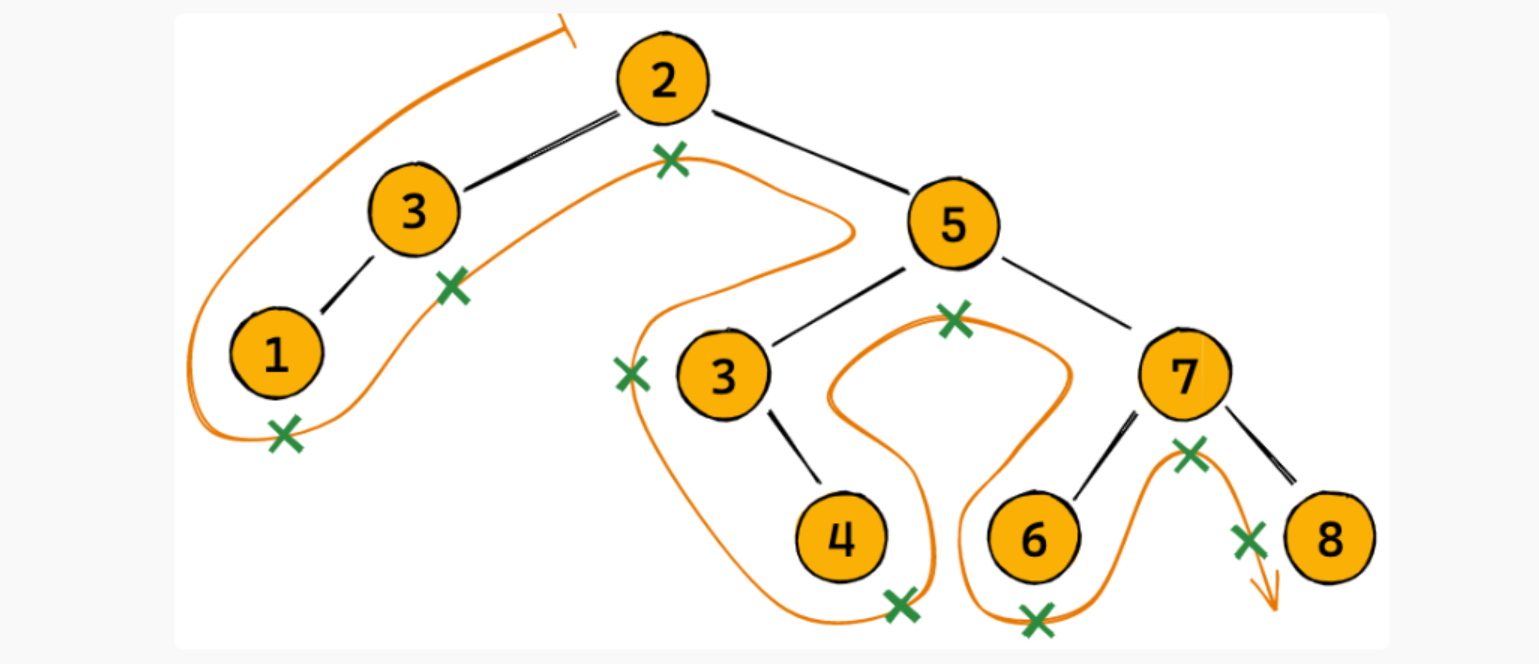

**Preorder traversal**

 - Traverse the current node.
 - Traverse the left subtree recursively preorder.
 - Traverse the right subtree recursively preorder.

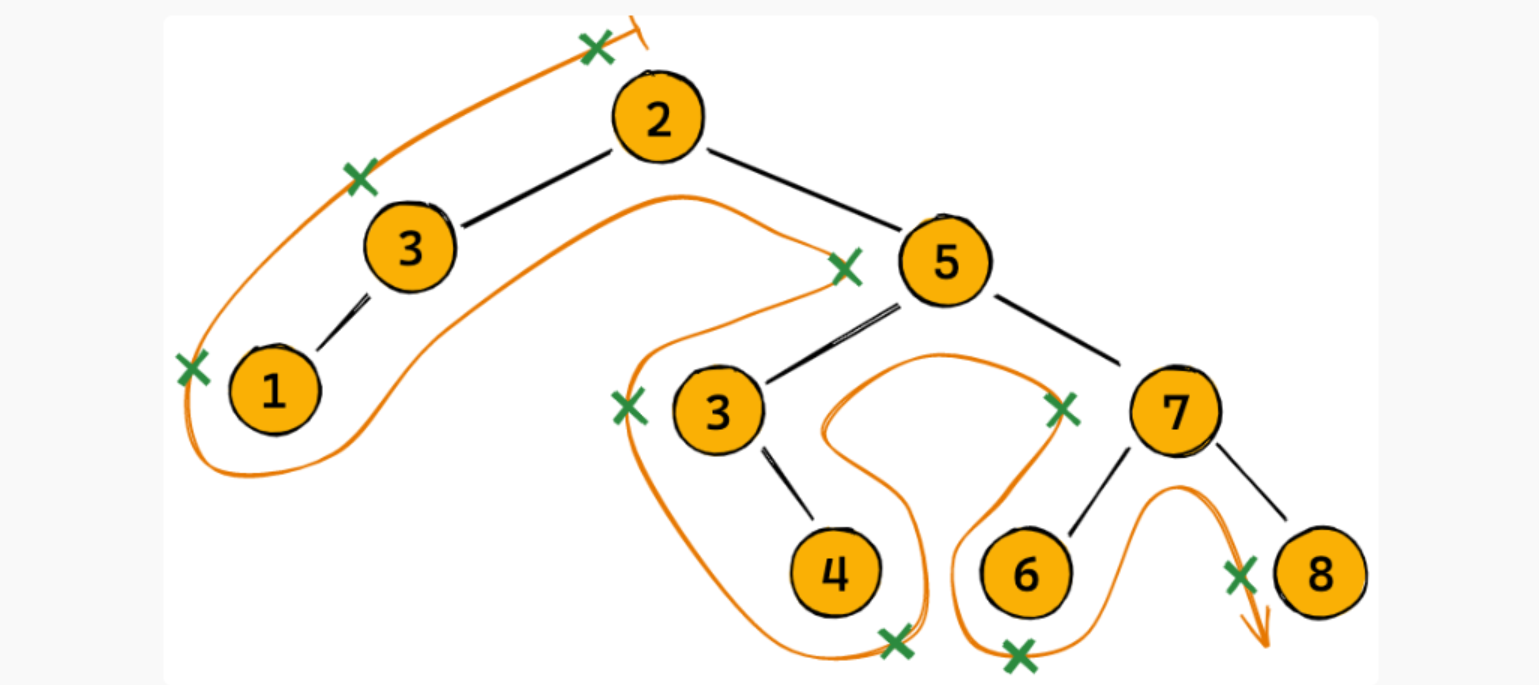

**postorder**

 - Traverse the left subtree recursively postorder.
 - Traverse the right subtree recursively postorder.
 - Traverse the current node.


In [ ]:
# our Binary tree class that represent every node
class TreeNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
def display_keys(node, level=0):
    if node is not None:
        display_keys(node.right, level + 1)  # Traverse right
        print(' ' * 4 * level + '->', node.key)  # Print current node key
        display_keys(node.left, level + 1)  # Traverse left
###### **Write a function to perform the inorder traversal of a binary tree.**
def inordertraversal(node):
    if node is not None:
        pass
###### **Write a function to perform the preorder traversal of a binary tree.**
def preordertraversal(node):
    if node is not None:
        pass
###### **Write a function to perform the postorder traversal of a binary tree.**
def postordertraversal(node):
    if node is not None:
        pass



In [48]:



# Write a function to calculate the height/depth of a binary tree

# Write a function to count the number of nodes in a binary tree






#  ##### **6.2  Binary Search Tree and Balanced BST**

# Write a function to check if a binary tree is a binary search tree (BST).

# Write a function to find the maximum key in a binary tree.

# Write a function to find the minimum key in a binary tree.

# Write a function to insert a new node into a BST.

# Find the value associated with a given key in a BST.

# Write a function to update the value associated with a given key within a BST

# Write a function to update the value associated with a given key within a BST

# Write a function to determine if a binary tree is balanced.

# Write a function to create a balanced BST from a sorted list/array of key-value pairs.

# Write a function to balance an unbalanced binary search tree.

#  ##### **6.3  Binary Tree Map**


#### **3. Come up with a correct solution. State it in plain English.**


#### **3. Come up with a correct solution. State it in plain English.**


#### **3. Come up with a correct solution. State it in plain English.**


### **Notes**

 - **Some common Big O run times**

Here are five Big O run times that you’ll encounter a lot, sorted from
fastest to slowest:

        1- O(log n), also known as log time. Example: Binary search.

        2- O(n), also known as linear time. Example: Simple search.

        3- O(n * log n). Example: A fast sorting algorithm, like quicksort (coming up in chapter 4).

        4- O(n2). Example: A slow sorting algorithm, like selection sort (coming up in chapter 2).

        5- O(n!). Example: A really slow algorithm, like the traveling salesperson (coming up next!).

###  **1.2.1 Binary Search Tree (BST)** 

A **Binary Search Tree (BST)** is a special type of binary tree where each node has at most two children, and it satisfies the following properties:

1. **Left Subtree Property**: All nodes in the left subtree of a node contain values that are less than the node's value.
2. **Right Subtree Property**: All nodes in the right subtree of a node contain values that are greater than the node's value.
3. **No Duplicates**: Typically, BSTs do not allow duplicate values.

#### Operations in a BST:
- **Insertion**: Add a new value to the tree, maintaining the binary search property.
- **Search**: Find whether a value exists in the tree.
- **Traversal**: Visit all nodes in a specific order (in-order, pre-order, or post-order).
- **Deletion**: Remove a node from the tree, ensuring the BST properties are still valid.

#### Python Implementation of a BST

##### Node and BST classes

```python
class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.value = key


class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, key):
        """Insert a new node with the given key"""
        if self.root is None:
            self.root = Node(key)
        else:
            self._insert_recursive(self.root, key)

    def _insert_recursive(self, current_node, key):
        if key < current_node.value:
            if current_node.left is None:
                current_node.left = Node(key)
            else:
                self._insert_recursive(current_node.left, key)
        elif key > current_node.value:
            if current_node.right is None:
                curr
